In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 9.0MB/s 
     |████████████████████████████████| 14.8MB 335kB/s 
     |████████████████████████████████| 10.9MB 50.8MB/s 


In [ ]:
!pip install mapclassify

In [ ]:
!pip install -U libpysal

     |████████████████████████████████| 2.4MB 8.7MB/s 
  Created wheel for libpysal: filename=libpysal-4.3.0-py2.py3-none-any.whl size=2379082 sha256=3090429bd4f71c664be441e0f344cc57db923ee715f7e2e70b69fb1632e1a2ea
  Stored in directory: /root/.cache/pip/wheels/68/44/db/3d7a8b7d9ae5dba0cfcfb37f14e2a6e6f26b03557bdf1cf06d
Successfully built libpysal


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas
import mapclassify
from mapclassify import greedy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
index_economic_freedom = pd.read_csv('/content/drive/My Drive/temp/index_economic_freedom.csv')
index_economic_freedom = index_economic_freedom.set_index('Country')
index_economic_freedom

1995  1996  1997  1998  1999  ...  2016  2017  2018  2019  2020
Country                                    ...                              
Afghanistan   NaN   NaN   NaN   NaN   NaN  ...   NaN  48.9  51.3  51.5  54.7
Albania      49.7  53.8  54.8  53.9  53.4  ...  65.9  64.4  64.5  66.5  66.9
Algeria      55.7  54.5  54.9  55.8  57.2  ...  50.1  46.5  44.7  46.2  46.9
Angola       27.4  24.4  24.2  24.9  23.7  ...  48.9  48.5  48.6  50.6  52.2
Argentina    68.0  74.7  73.3  70.9  70.6  ...  43.8  50.4  52.3  52.2  53.1
...           ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
Venezuela    59.8  54.5  52.8  54.0  56.1  ...  33.7  27.0  25.2  25.9  25.2
Vietnam      41.7  40.2  38.6  40.4  42.7  ...  54.0  52.4  53.1  55.3  58.8
Yemen        49.8  49.6  48.4  46.1  43.3  ...   NaN   NaN   NaN   NaN   NaN
Zambia       55.1  59.6  62.1  62.7  64.2  ...  58.8  55.8  54.3  53.6  53.5
Zimbabwe     48.5  46.7  48.0  44.6  47.2  ...  38.2  44.0  44.0  40.4  43.1

[184 rows x 26 columns]

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world['greedy_default'] = greedy(world, strategy='balanced', balance='area')
world = world.set_index('name')

In [ ]:
def geo_create_column_index_year(geo, data, year, name):
  index = [c for c in geo.index if c in data.index]
  value = [data.loc[i][year] for i in index]
  value
  s = pd.Series(value, index)
  s = s.fillna(-1)
  column_name = name + "_" + year
  geo[column_name] = s
  geo[column_name] = geo[column_name].fillna(0)
  return geo


In [ ]:
for geo in index_economic_freedom.columns:
  world = geo_create_column_index_year(world, index_economic_freedom, geo, 'index_economic_freedom')

In [ ]:
def geo_save_index_to_png(geo, index_name):
  ax = geo.plot(index_name, 
                categorical=False, 
                cmap='Dark2', 
                figsize=(16, 12),
                edgecolor='gray',
                legend=True,
                legend_kwds= {'orientation': "horizontal"})
  ax.set_axis_off()
  ax.set_title(index_name, fontsize=20)

  ax.figure.savefig('/content/drive/My Drive/temp/' + index_name + '.png')



Text(0.5, 1.0, 'index_economic_freedom_1995')

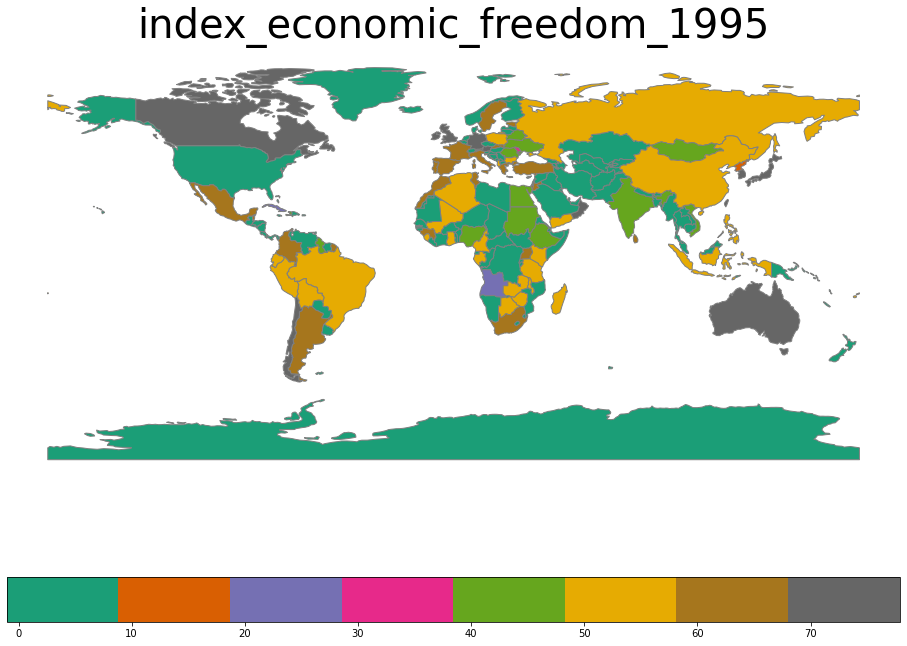

In [ ]:
ax = world.plot('index_economic_freedom_1995', 
                categorical=False, 
                cmap='Dark2', 
                figsize=(16, 12),
                edgecolor='gray',
                legend=True,
                legend_kwds= {'orientation': "horizontal"})
ax.set_axis_off()
ax.set_title("index_economic_freedom_1995", fontsize=40)

In [ ]:
#ax.figure.savefig('/content/drive/My Drive/temp/1999.png')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

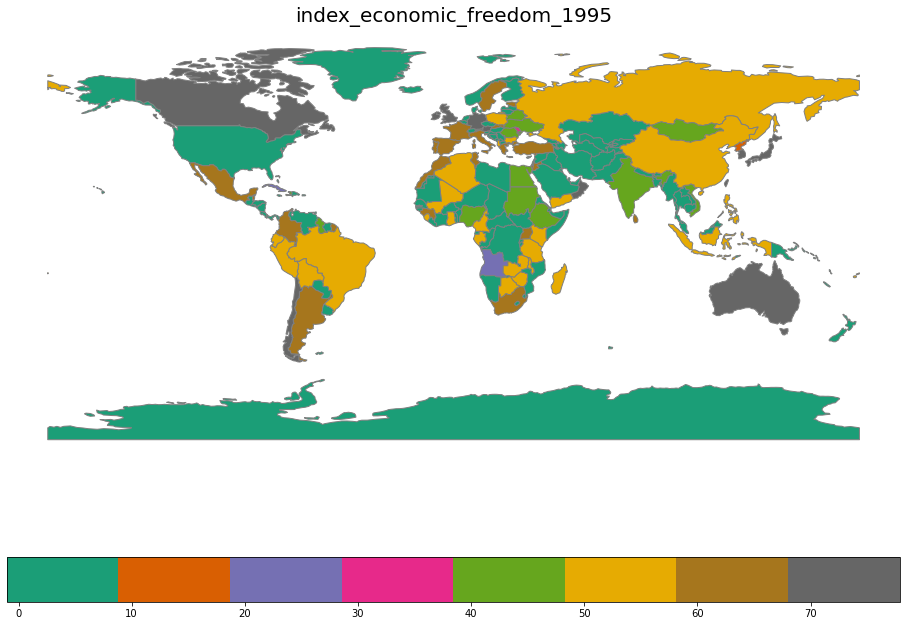

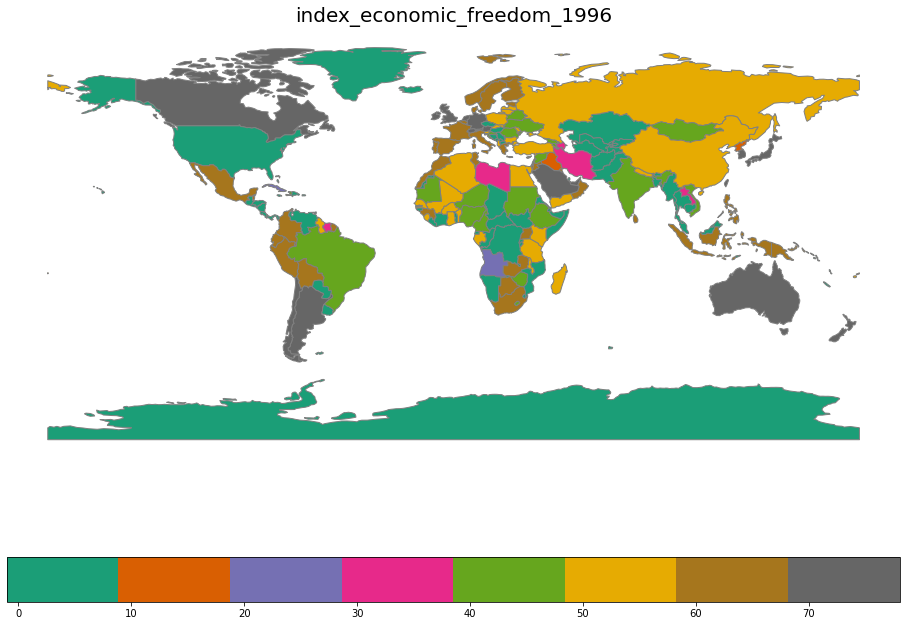

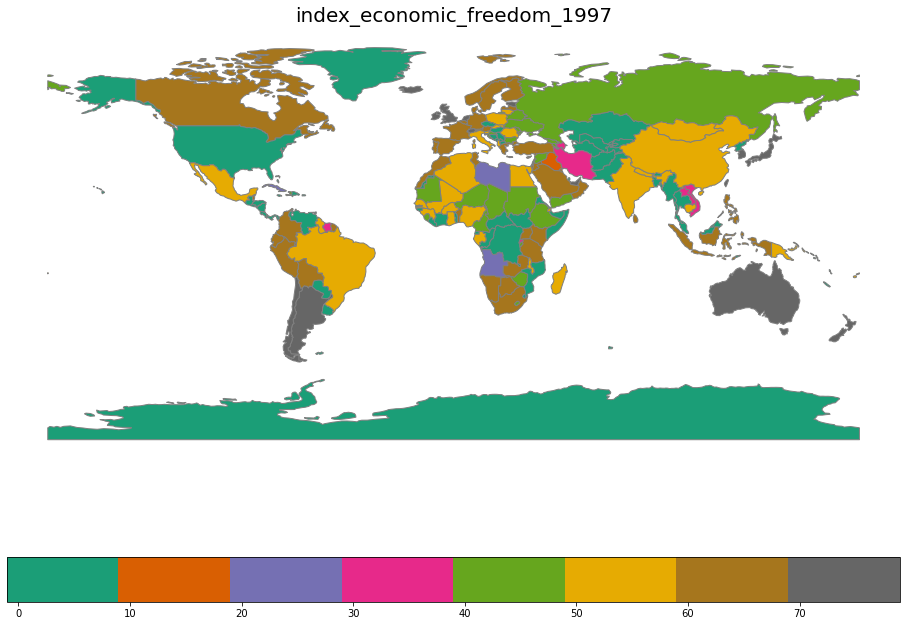

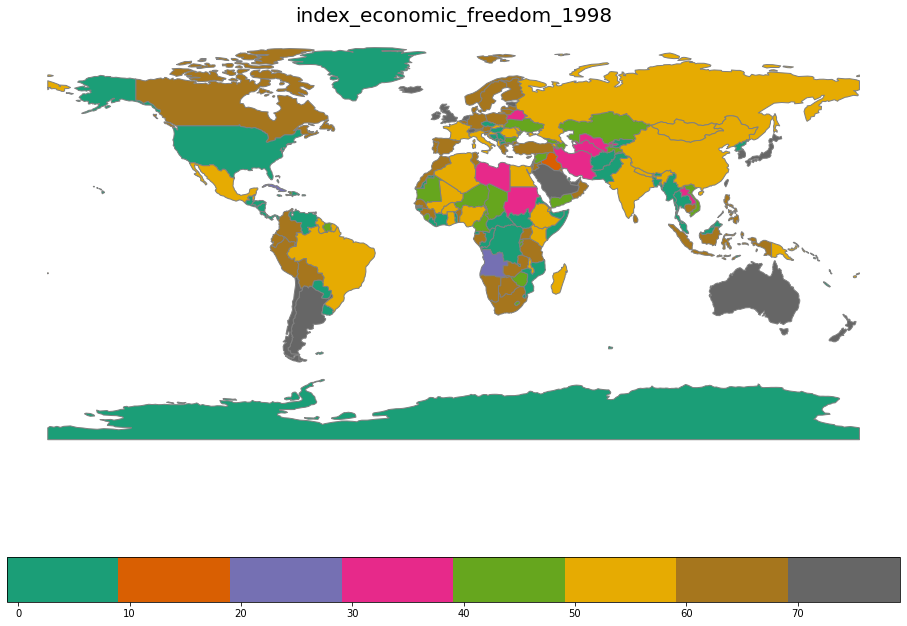

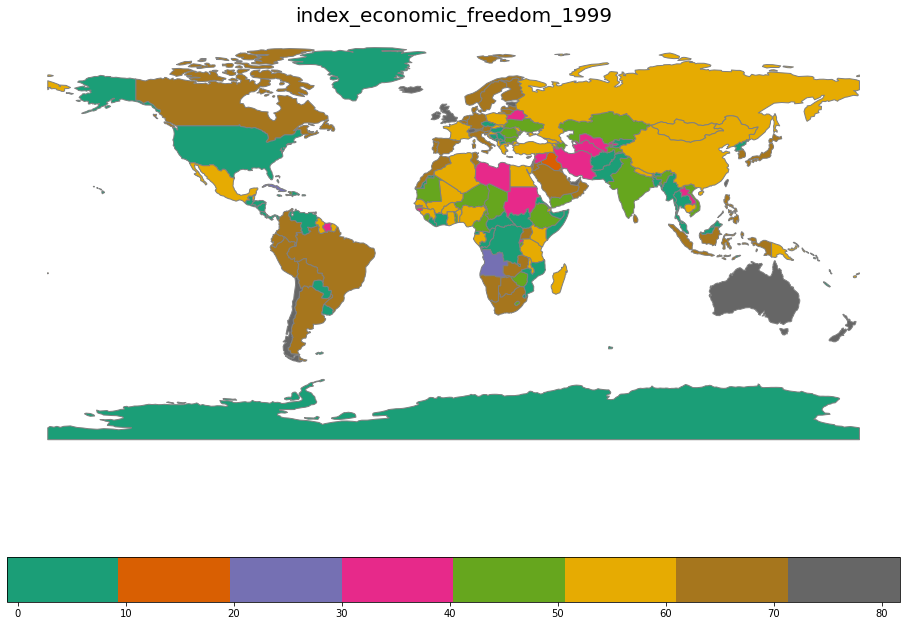

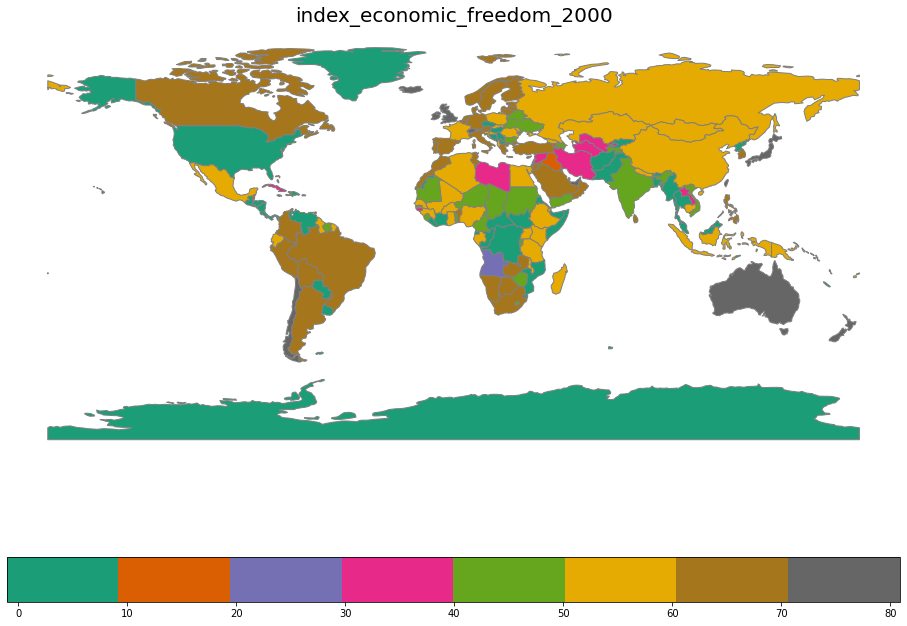

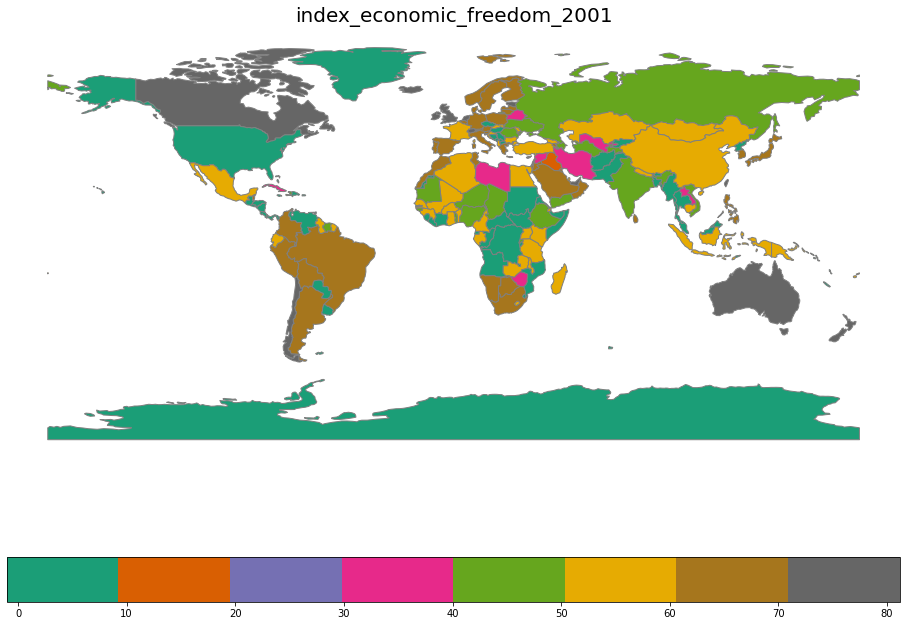

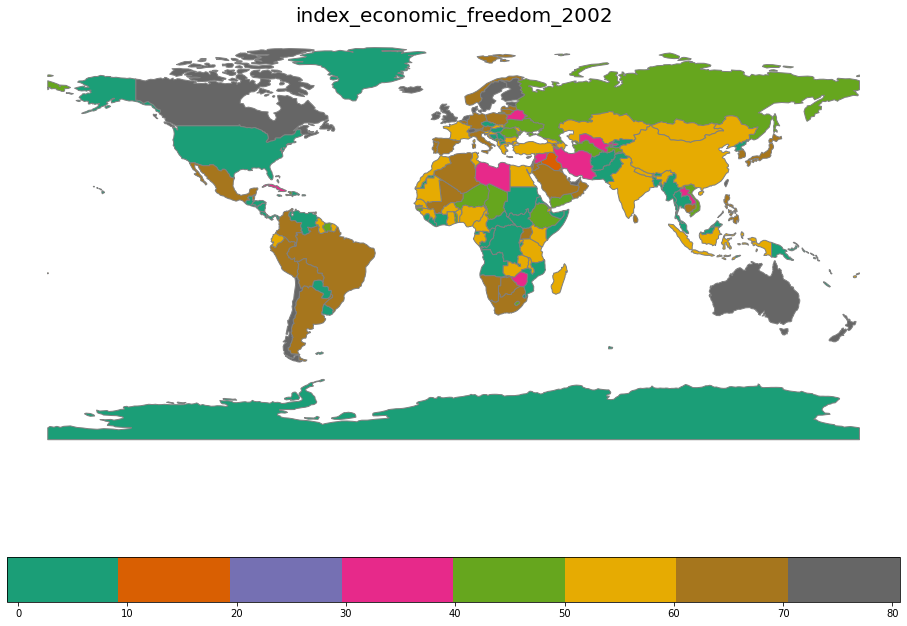

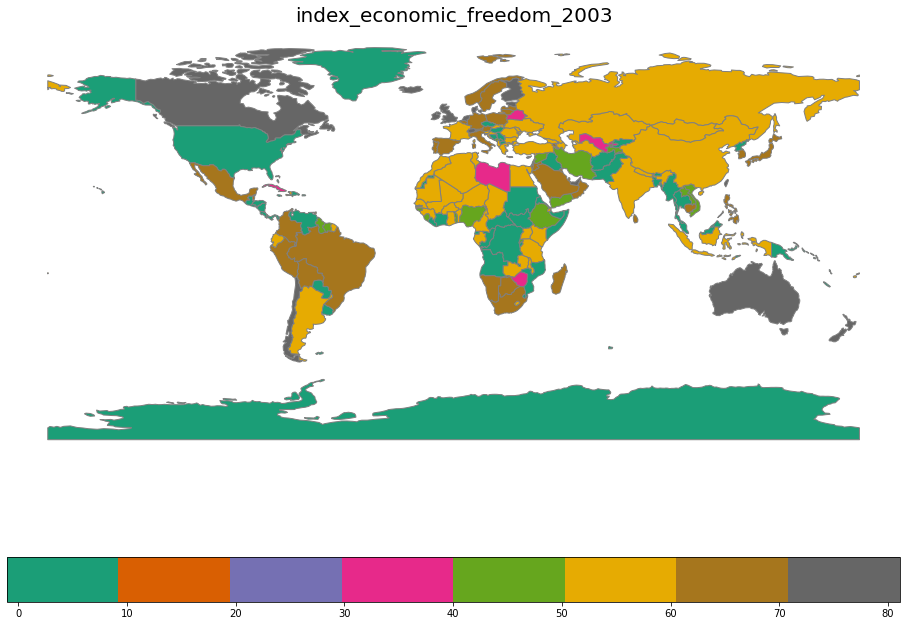

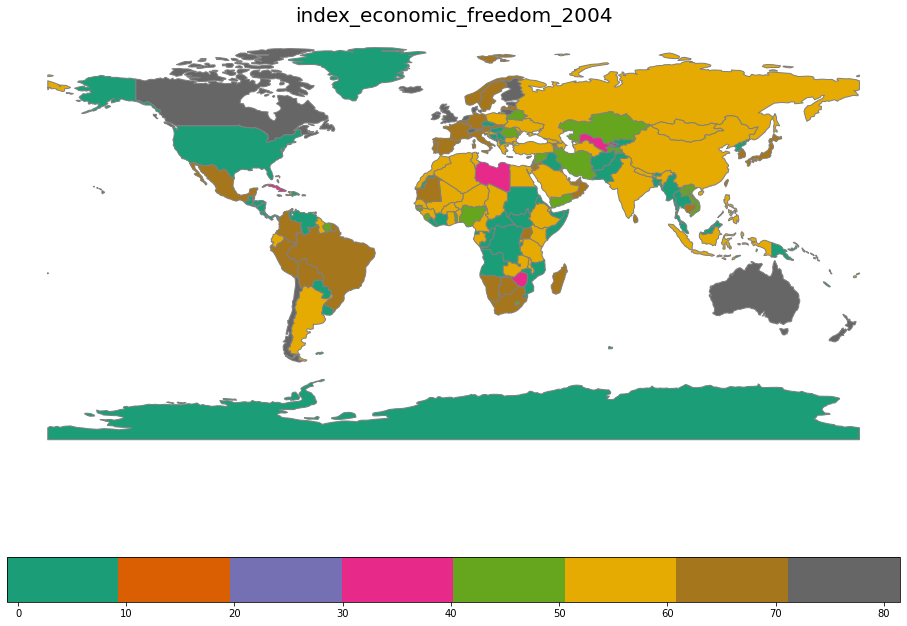

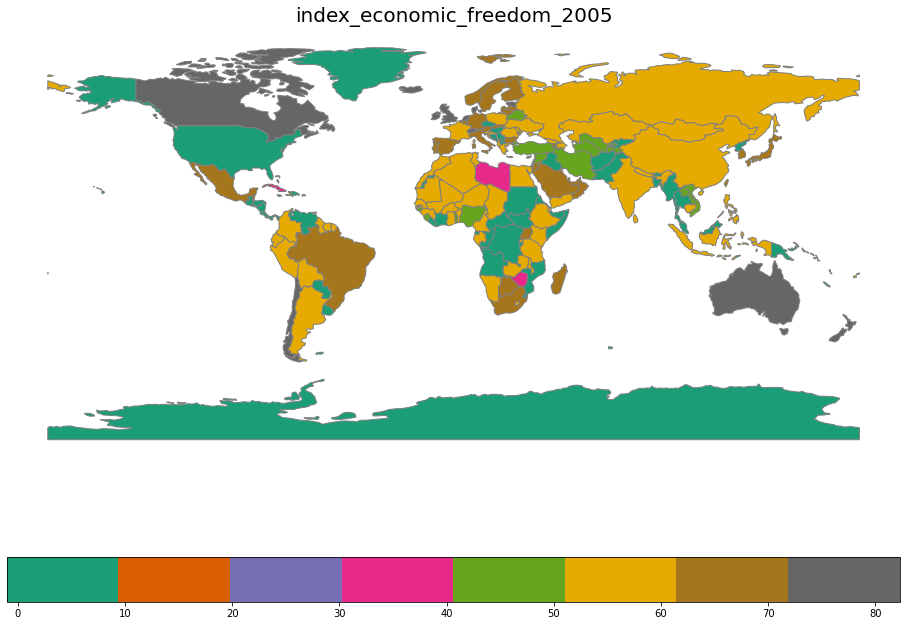

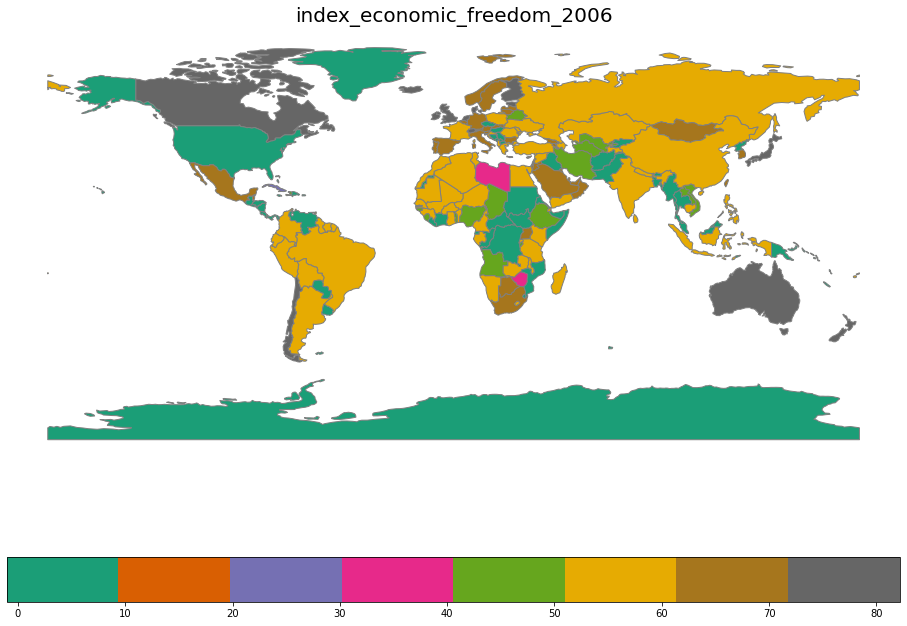

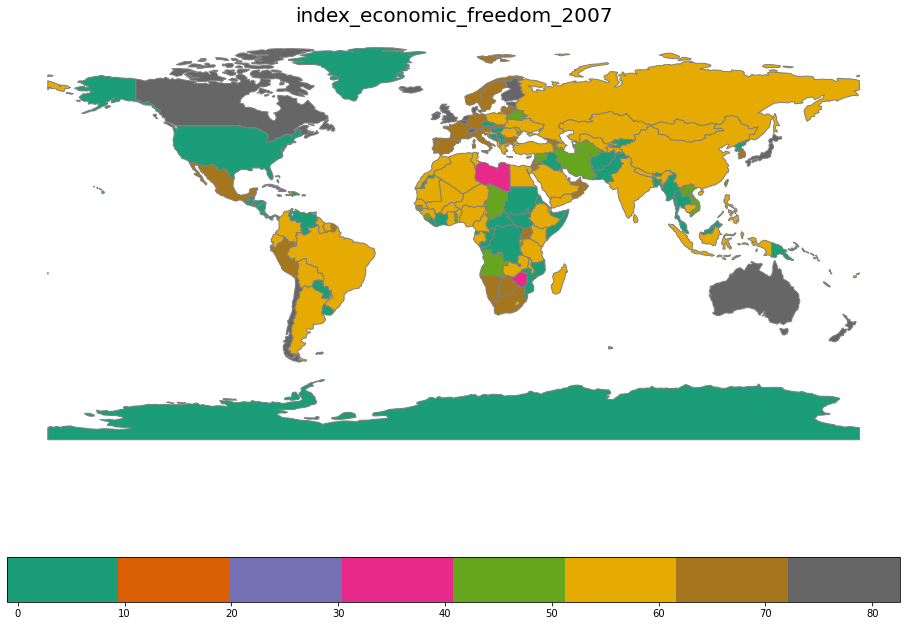

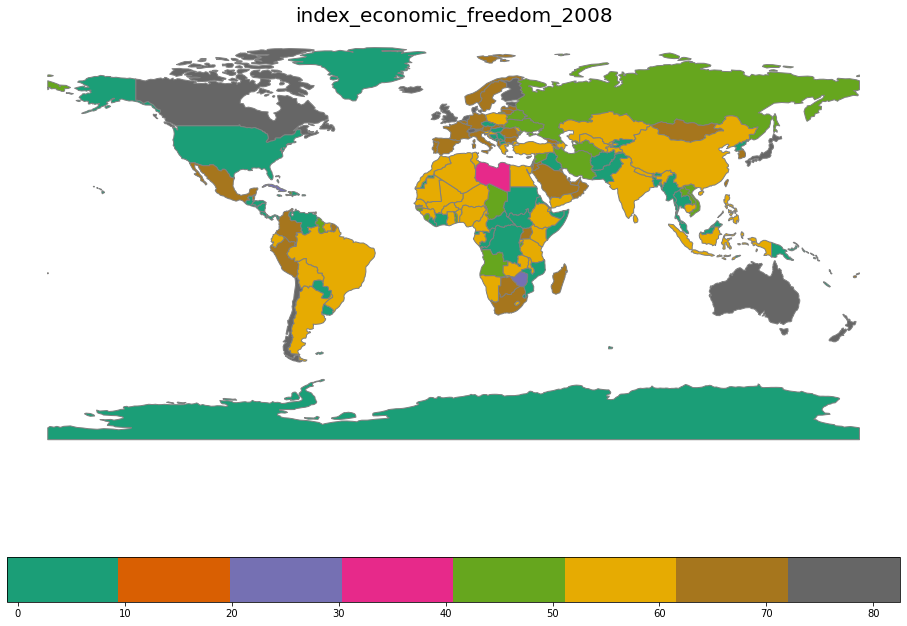

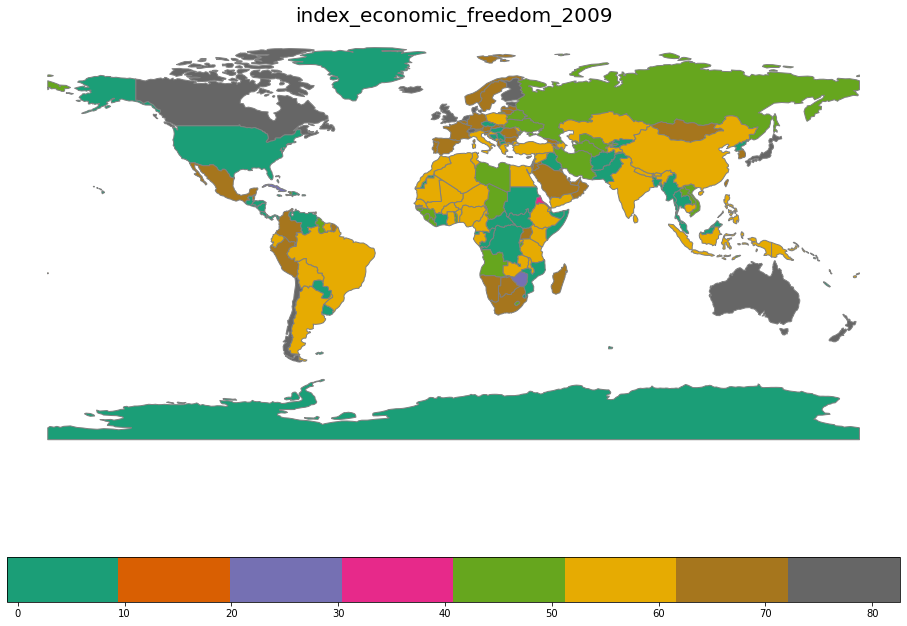

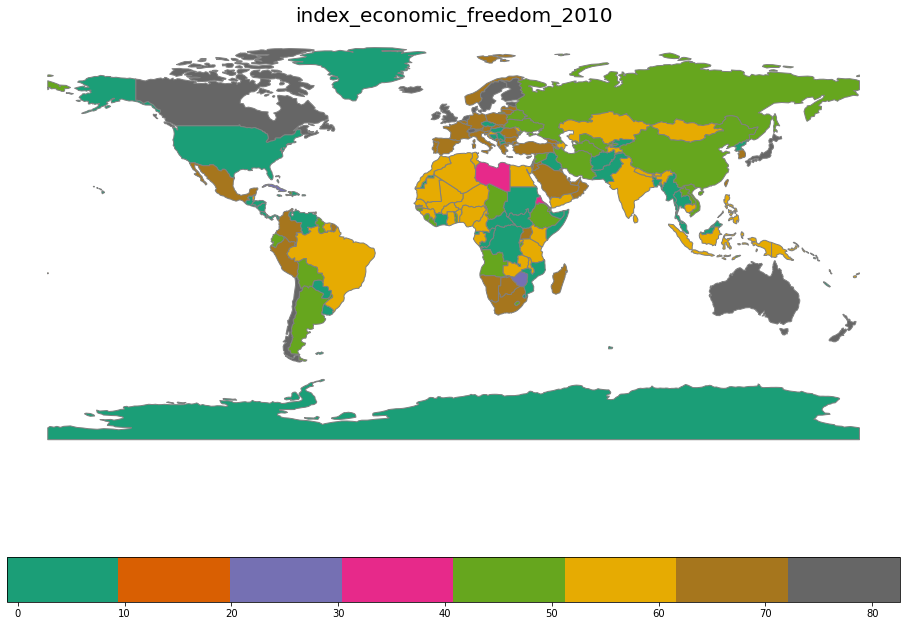

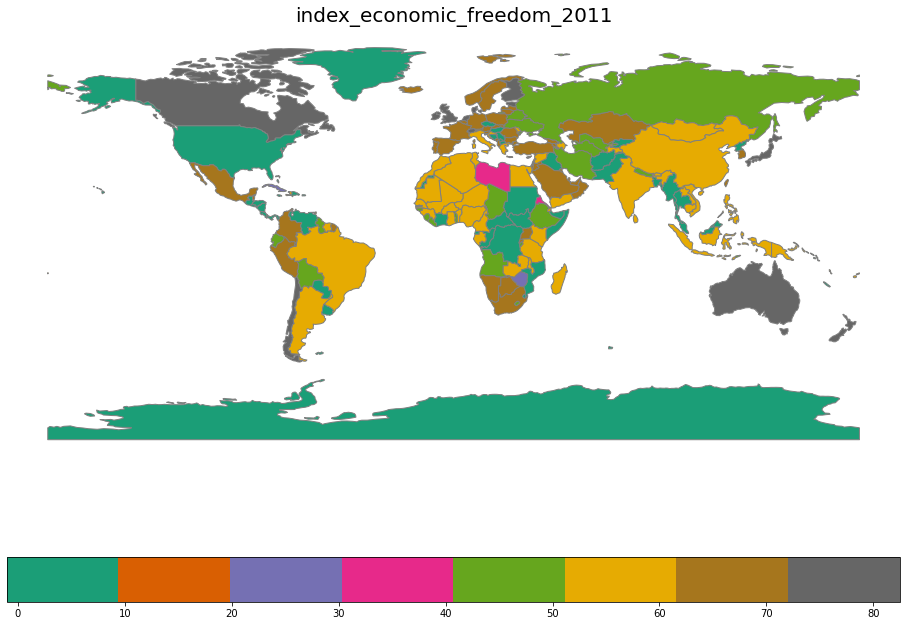

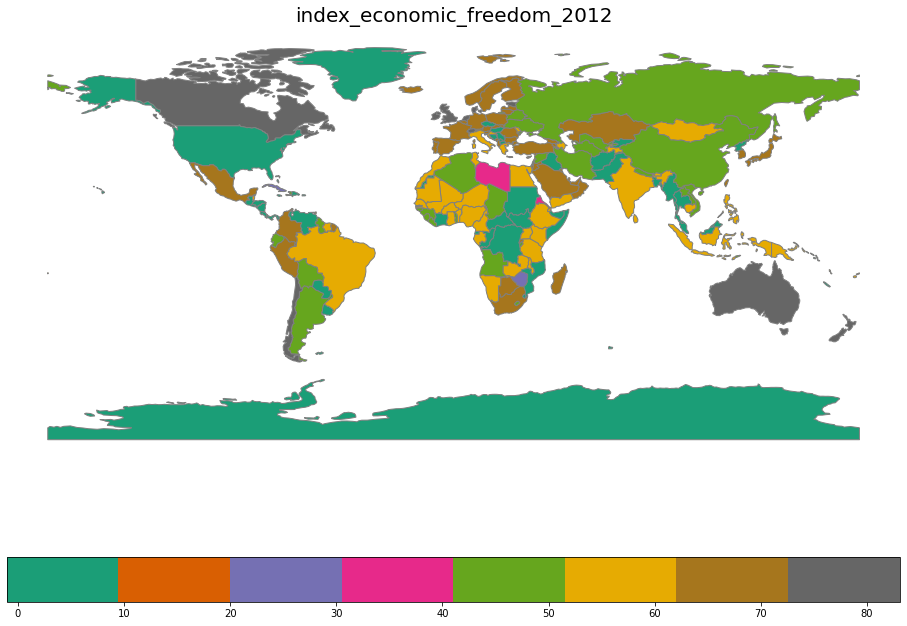

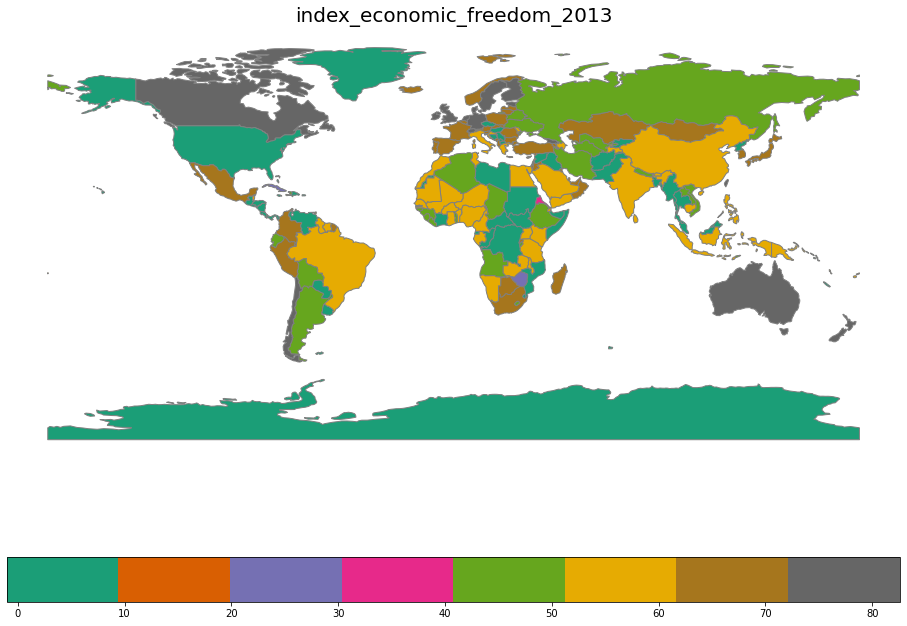

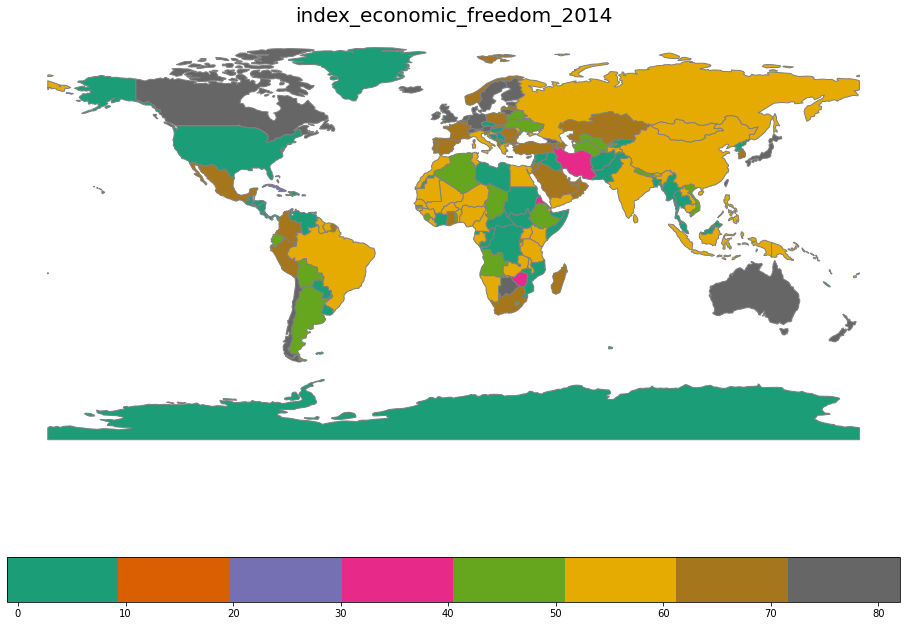

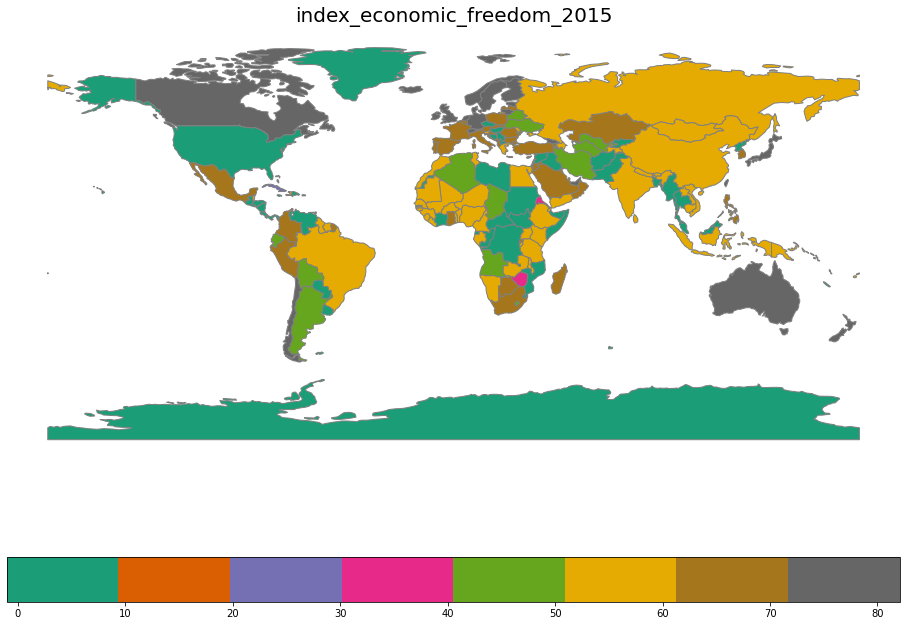

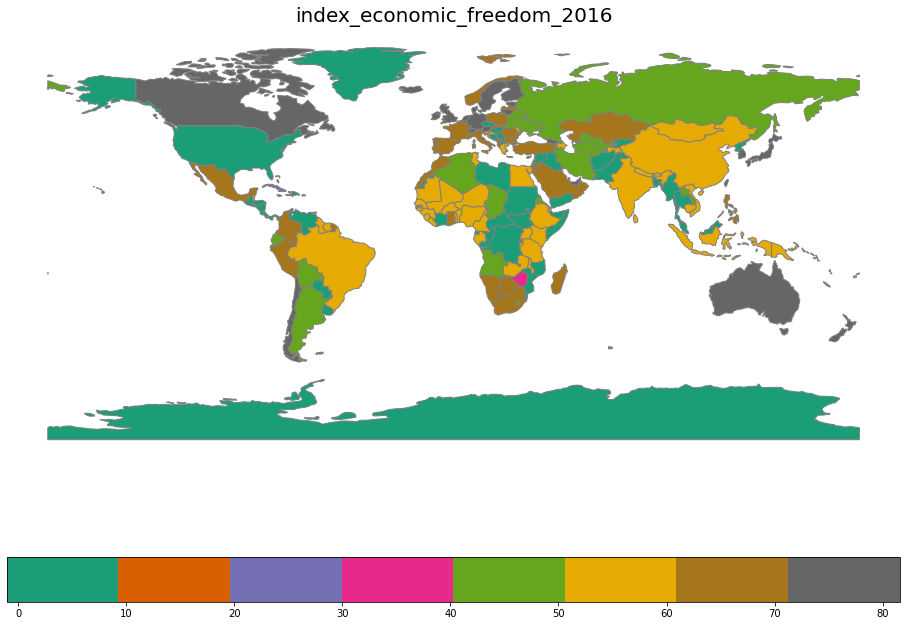

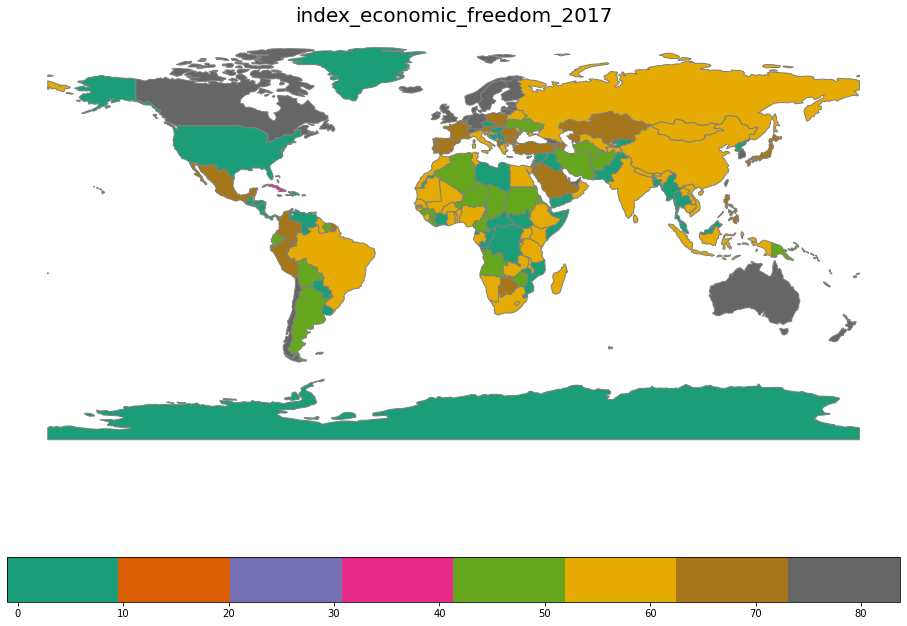

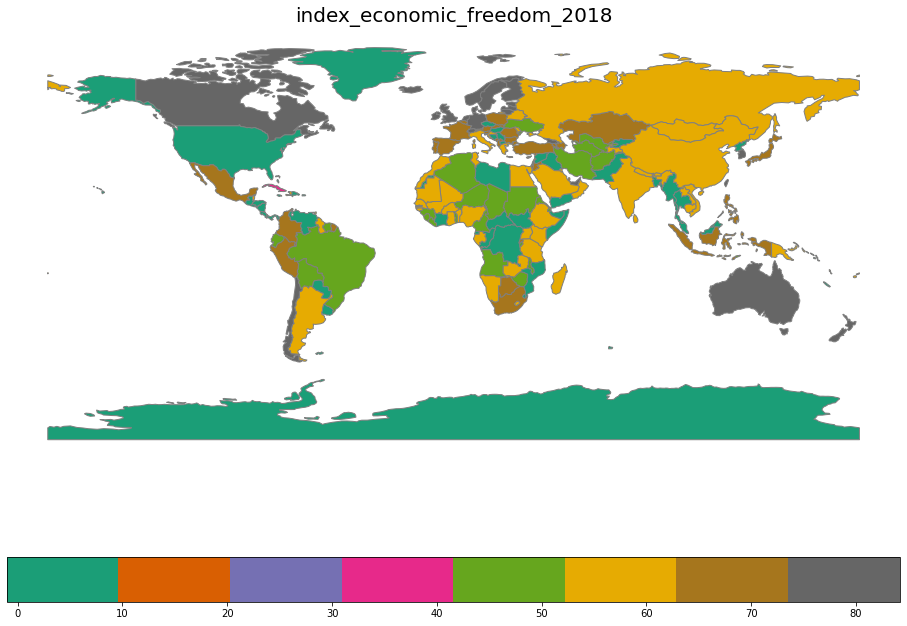

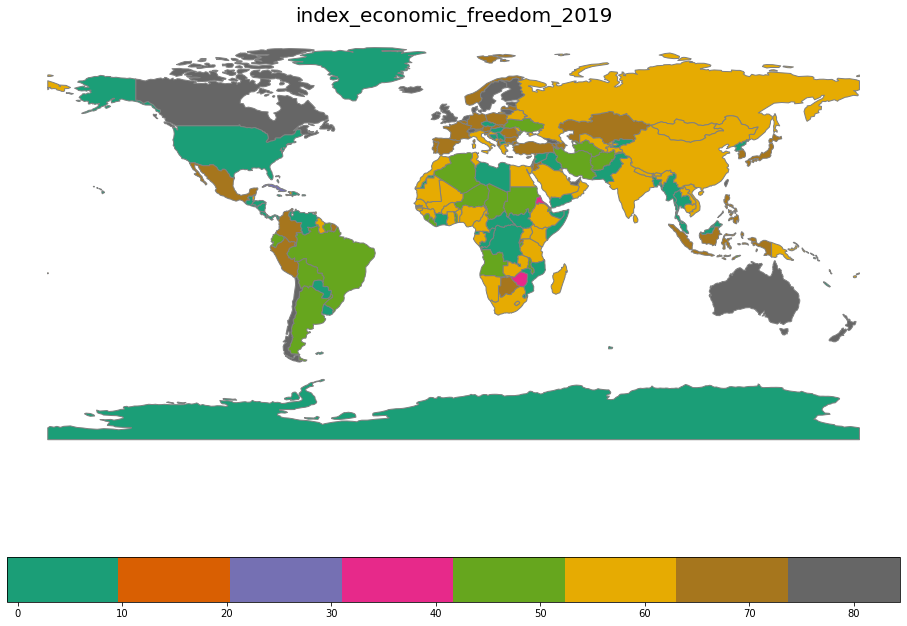

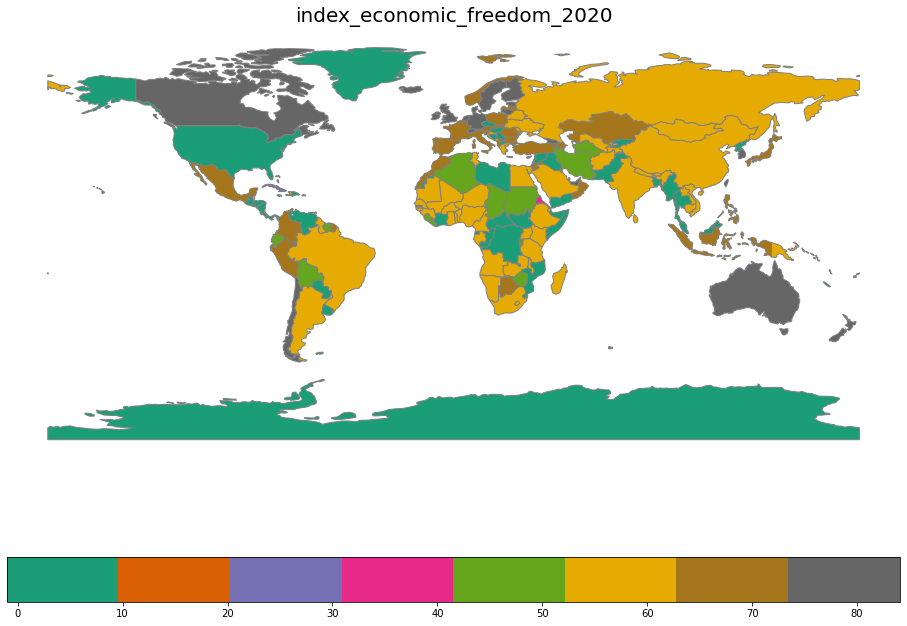

In [ ]:
for year in index_economic_freedom.columns:
  geo_save_index_to_png(world, 'index_economic_freedom_'+year)